# Tutorial Six: Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
from numpy import unique  
from numpy import where 

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

采用取随机种子的方式构建数据集。随机种子取的是学号6；样本量为1500。取颜色为红绿蓝，附加一点颜色

In [2]:
# ============
# Generate datasets
# ============
np.random.seed(6)
n_samples = 1500 # sample size
colors = ['red', 'green', 'blue','yellow','pink','purple','grey','orange','sandybrown','tan','gold','olive','Aqua','DeepSkyBlue','LightSlateGray','brown','LightCoral']

# ============
# Definitions of Fuctions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

## Task1：阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。

以一组标准正态分布的数据点为基础，将其不等分为3份，奔驰形分割。三组数据量不相等。

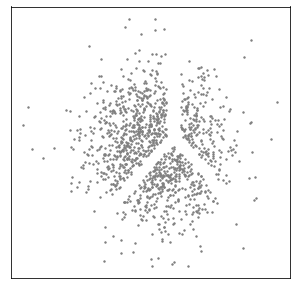

In [3]:
x = np.random.randn(n_samples, 2) # 二维
condition1 = x[:, 1] <= -0.4+x[:, 0] # y>=0.3+x
condition2 = x[:, 1] <= (0.6-x[:, 0]) # y>=1.3-x
index1 = np.where(condition1 & condition2) # 返回符合条件的元素坐标
x61 = x[index1]
condition3 = x[:, 1] <= x[:, 0] # y>=x
condition4 = x[:, 1] <= (1-x[:, 0]) # y>=1-x
index1_plus=np.where(condition3 & condition4)
x = np.delete(x, index1_plus, axis=0) # 排除后分两份

index2 = x[:, 0] <= 0.3 # 两份
x62 = x[index2]
index2_plus=x[:, 0] <= 0.7
x63 = np.delete(x, index2_plus, axis=0)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks([])
plt.yticks([])
plt.scatter(x61[:,0],x61[:,1],color="grey",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="grey",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="grey",s = 2)
plt.show()

dataset6 = np.r_[x61,x62,x63]
y61=[0 for i in range(x61.shape[0])]
y62=[1 for i in range(x62.shape[0])]
y63=[2 for i in range(x63.shape[0])]
y6_labels=y61+y62+y63

添上老师提供的另外5种人工数据集。

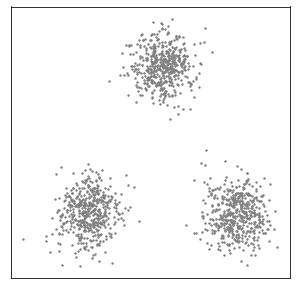

In [4]:
## Case One : Simple Case (Equal Variance and Equal Size)
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]
y11=[0 for i in range(n_subset)]
y12=[1 for i in range(n_subset)]
y13=[2 for i in range(n_subset)]
y1_labels=y11+y12+y13

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="grey",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="grey",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="grey",s = 2)


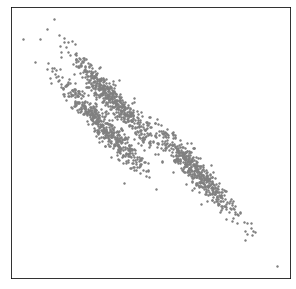

In [5]:
## Case Two : High-Covariance Case 
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]
y21=[0 for i in range(n_subset)]
y22=[1 for i in range(n_subset)]
y23=[2 for i in range(n_subset)]
y2_labels=y21+y22+y23

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="grey",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="grey",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="grey",s = 2)

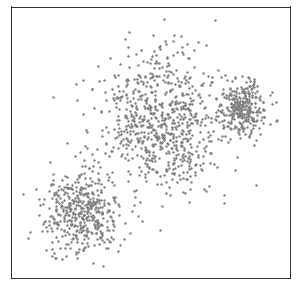

In [6]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]
y31=[0 for i in range(n_subset1)]
y32=[1 for i in range(n_subset2)]
y33=[2 for i in range(n_subset3)]
y3_labels=y31+y32+y33

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="grey",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="grey",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="grey",s = 2)

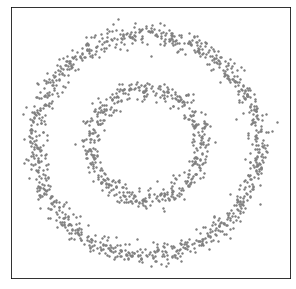

In [7]:
## Case Four : Ring Plot
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]
y41=[0 for i in range(n_subset1)]
y42=[1 for i in range(n_subset2)]
y4_labels=y41+y42

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="grey",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="grey",s = 2)

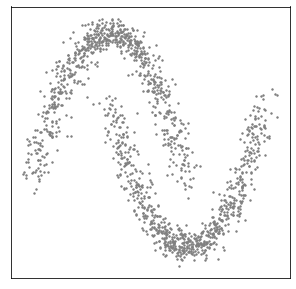

In [8]:
## Case Five : Wave Plot
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]
y51=[0 for i in range(n_subset)]
y52=[1 for i in range(n_subset)]
y5_labels=y51+y52

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="grey",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="grey",s = 2)


## Task2：采用不同的聚类方式（包括：层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。

### Case 1：等量等方差

- 层次聚类

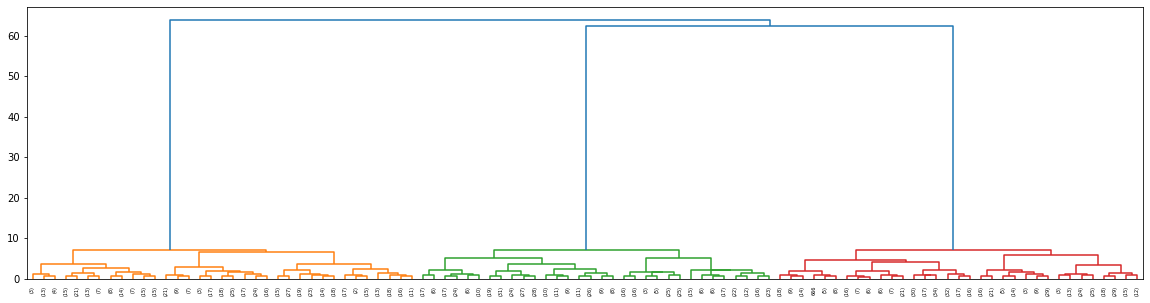

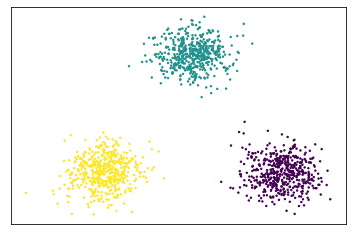

In [9]:
from scipy.cluster.hierarchy import linkage     #导入linage函数用于层次聚类
from scipy.cluster.hierarchy import dendrogram  #dendrogram函数用于将聚类结果绘制成树状图
from scipy.cluster.hierarchy import fcluster    #fcluster函数用于提取出聚类的结果
from sklearn.cluster import AgglomerativeClustering  #自底向上层次聚类算法

Z = linkage(dataset1, method='ward', metric='euclidean') # 方差最小化，选取欧氏距离
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# # 根据临界距离返回聚类结果，t为阈值
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

# 根据聚类数目返回聚类结果，t为类别数
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset1[:, 0], dataset1[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

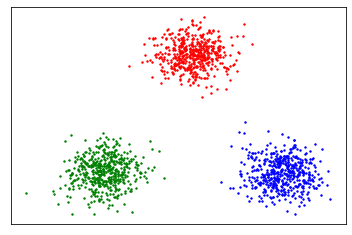

In [10]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset1)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset1[i][0], dataset1[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

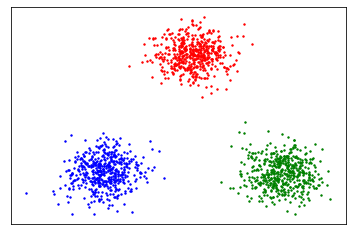

In [11]:
 model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset1)  # 先fit后predict，计算簇的中心->预测每个样本所属的簇类别
clusters = unique(yhat)  # 样本类别去重
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset1[row_ix, 0], dataset1[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

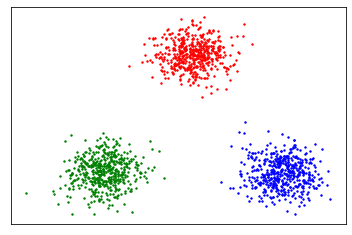

In [12]:
model = DBSCAN(eps=0.5, min_samples=5)  # eps领域
yhat = model.fit_predict(dataset1)  # 先fit后predict，计算簇的中心->预测每个样本所属的簇类别
clusters = unique(yhat) # 样本类别去重

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  # 属于该类别
    plt.scatter(dataset1[row_ix, 0], dataset1[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case 2：高相关性

- 层次聚类

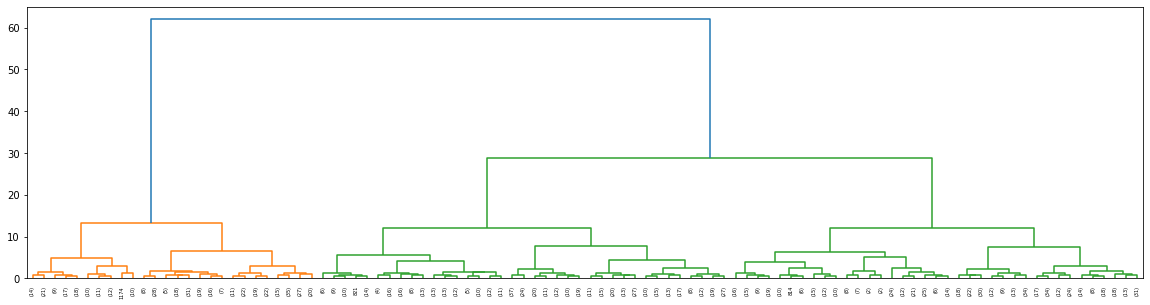

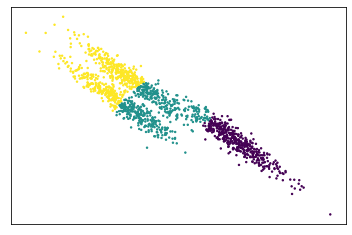

In [13]:
Z = linkage(dataset2, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

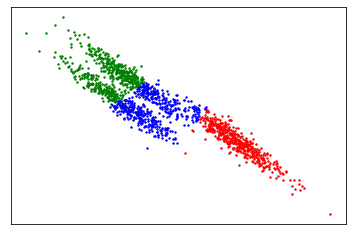

In [14]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset2)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset2[i][0], dataset2[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

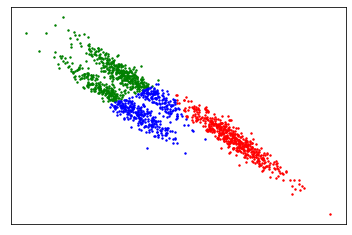

In [15]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset2)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset2[row_ix, 0], dataset2[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

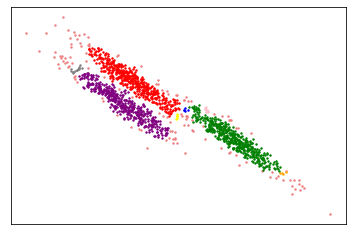

In [16]:
model = DBSCAN(eps=0.08, min_samples=5)  
yhat = model.fit_predict(dataset2)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset2[row_ix, 0], dataset2[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case 3：不等量不等方差

- 层次聚类

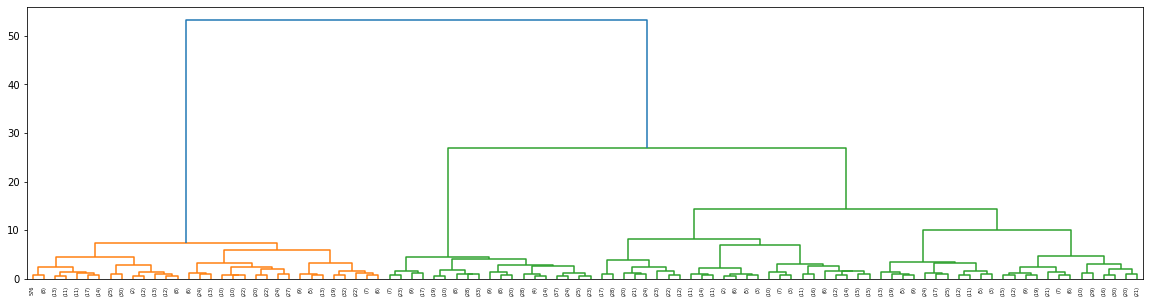

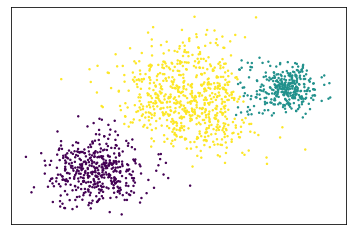

In [17]:
Z = linkage(dataset3, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset3[:, 0], dataset3[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

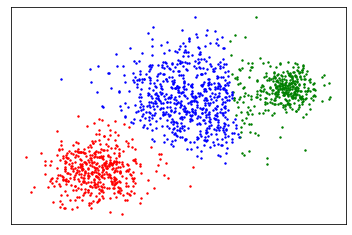

In [18]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset3)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset3[i][0], dataset3[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

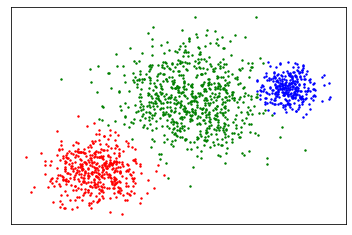

In [19]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset3)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset3[row_ix, 0], dataset3[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

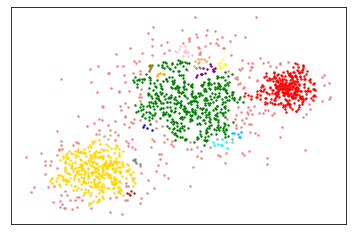

In [20]:
model = DBSCAN(eps=0.08, min_samples=5)  
yhat = model.fit_predict(dataset3)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset3[row_ix, 0], dataset3[row_ix, 1], color = colors[cluster],s=2)
plt.show()  

### Case 4：环形图

- 层次聚类

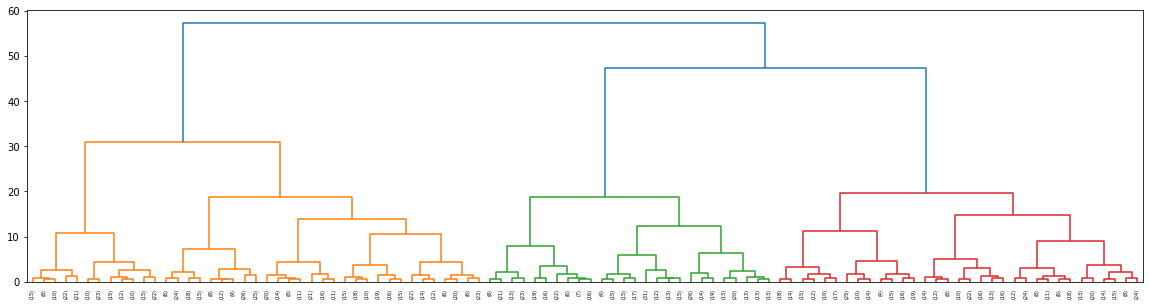

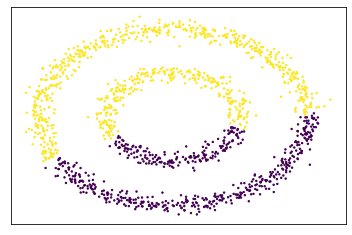

In [21]:
Z = linkage(dataset4, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 2
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset4[:, 0], dataset4[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

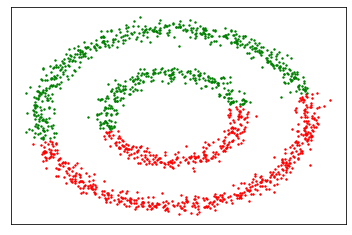

In [22]:
kmeans = KMeans(n_clusters = 2,max_iter=100).fit(dataset4)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset4[i][0], dataset4[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

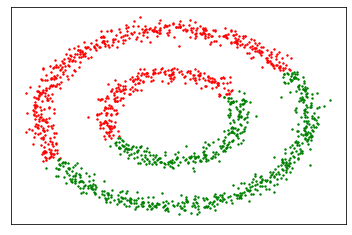

In [23]:
model = GaussianMixture(n_components=2)  
yhat = model.fit_predict(dataset4)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset4[row_ix, 0], dataset4[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

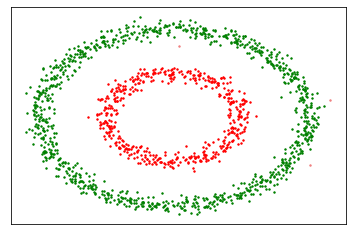

In [24]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset4)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset4[row_ix, 0], dataset4[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case 5：波浪形

- 层次聚类

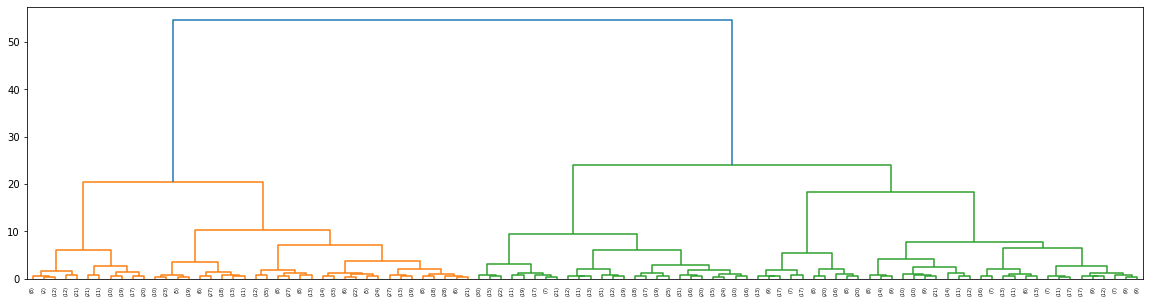

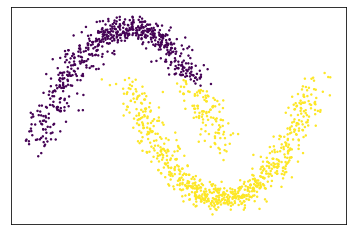

In [25]:
Z = linkage(dataset5, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 2
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset5[:, 0], dataset5[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

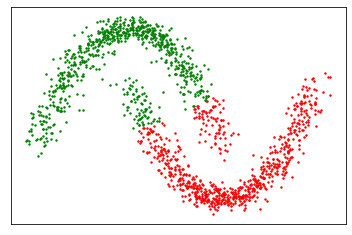

In [26]:
kmeans = KMeans(n_clusters = 2,max_iter=100).fit(dataset5)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset5[i][0], dataset5[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

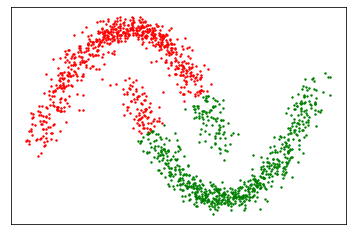

In [27]:
model = GaussianMixture(n_components=2)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

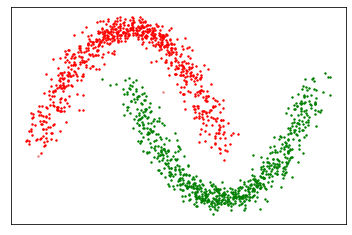

In [28]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### 我自己的Case

- 层次聚类

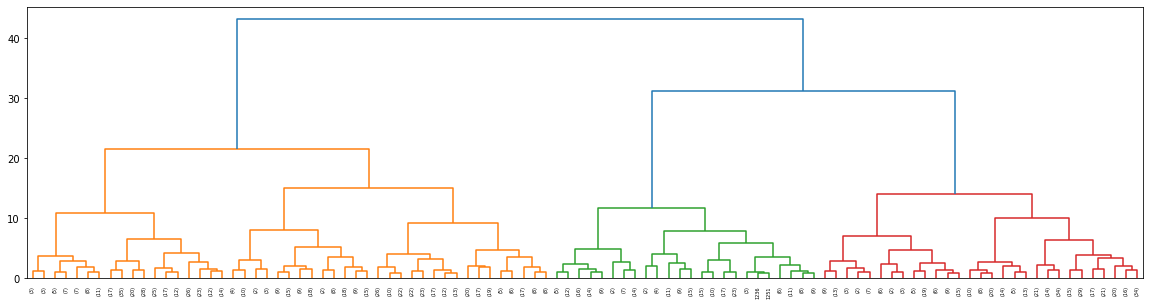

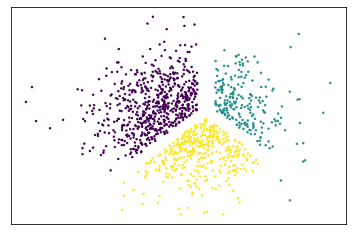

In [29]:
Z = linkage(dataset6, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset6[:, 0], dataset6[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

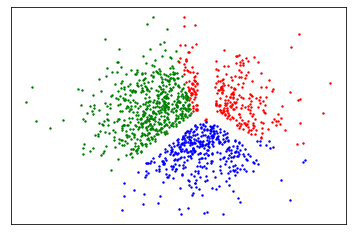

In [30]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset6)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset6[i][0], dataset6[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

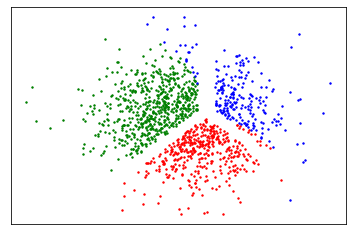

In [31]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset6)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset6[row_ix, 0], dataset6[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

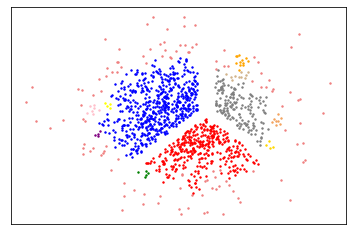

In [32]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset6)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset6[row_ix, 0], dataset6[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

## Task3：请用绘图的方式展示不同聚类方式的结果。

In [33]:
def all_cluster(dataset,k,eps):
    # 层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
    plt.subplot(221)
    plt.title('Hierarchical Clustering')
    plt.xticks(())
    plt.yticks(())
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels_2,s=2)

    # Kmeans
    kmeans = KMeans(n_clusters = k,max_iter=100).fit(dataset)
    plt.subplot(222)
    plt.title('Kmeans')
    plt.xticks(())
    plt.yticks(())
    for i, cluster in enumerate(kmeans.labels_):
        plt.scatter(dataset[i][0], dataset[i][1], color = colors[cluster],s=2)

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    yhat = gmm.fit_predict(dataset)  
    clusters = unique(yhat)  
    plt.subplot(223)
    plt.title('GMM')
    plt.xticks(())
    plt.yticks(())
    for cluster in clusters:  
        row_ix = where(yhat == cluster)  
        plt.scatter(dataset[row_ix, 0], dataset[row_ix, 1], color = colors[cluster],s=2)  

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    yhat = dbscan.fit_predict(dataset)  
    clusters = unique(yhat)  
    plt.subplot(224)
    plt.title('DBscan')
    plt.xticks(())
    plt.yticks(())
    for cluster in clusters:  
        row_ix = where(yhat == cluster)  
        plt.scatter(dataset[row_ix, 0], dataset[row_ix, 1], color = colors[cluster],s=2)  

    plt.show()  

### Case 1 ：  等量等方差

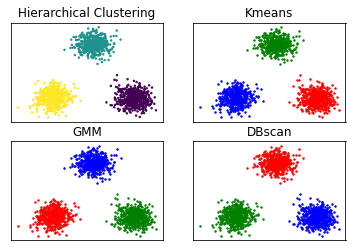

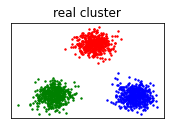

In [34]:
all_cluster(dataset1,3,0.5)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="blue",s = 2)
plt.show()

### Case 2：高相关性

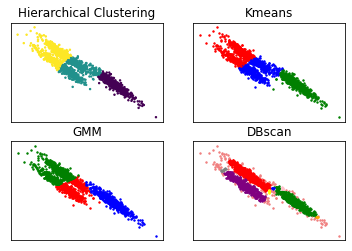

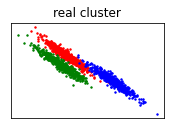

In [35]:
all_cluster(dataset2,3,0.08)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="blue",s = 2)
plt.show()

### Case 3：不等量不等方差

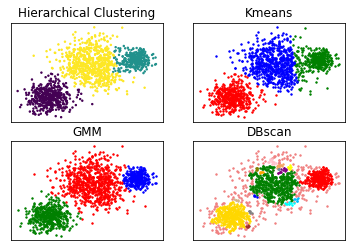

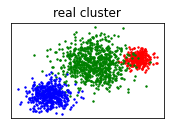

In [36]:
all_cluster(dataset3,3,0.08)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="blue",s = 2)
plt.show()

### Case 4：环形图

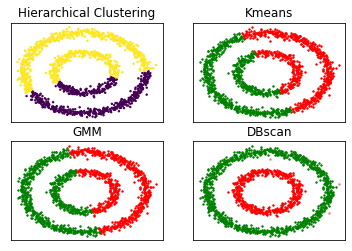

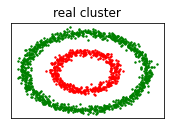

In [37]:
all_cluster(dataset4,2,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="green",s = 2)
plt.show()

### Case 5：波浪形

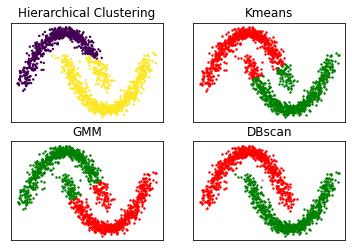

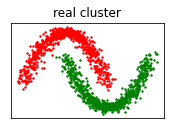

In [38]:
all_cluster(dataset5,2,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="green",s = 2)
plt.show()

### Case 6：我自己的case

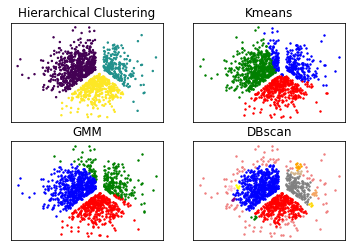

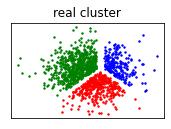

In [39]:
all_cluster(dataset6,3,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x61[:,0],x61[:,1],color="red",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="green",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="blue",s = 2)
plt.show()

## Task4：在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法，结果请填入下表。

内部有效性主要取轮廓值，外部有效性主要取调和平均 V-measure。

其他方法的计算在后面有，但是没放在表中。

### Case1
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.9999                 </td>
        <td> 0.8030                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.9999                 </td>
        <td> 0.8030                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.9999                 </td>
        <td> 0.8030                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9999                 </td>
        <td> 0.8030                 </td>
    </tr>
</table>

### Case2
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.4474                 </td>
        <td> 0.4870                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.4612                 </td>
        <td> 0.4922                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.5491                 </td>
        <td> 0.4703                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.7529                 </td>
        <td> -0.0162                 </td>
    </tr>
</table>

### Case3
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.8377                 </td>
        <td> 0.5301                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.7896                 </td>
        <td> 0.5335                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.8797                 </td>
        <td> 0.5172                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.6078                 </td>
        <td> -0.0661                 </td>
    </tr>
</table>

### Case4
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.0009                 </td>
        <td> 0.3518                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.0007                 </td>
        <td> 0.3631                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.0001                 </td>
        <td> 0.3599                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9894                 </td>
        <td> -0.0409                 </td>
    </tr>
</table>

### Case5
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.6742                 </td>
        <td> 0.5141                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.5041                 </td>
        <td> 0.5521                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.4556                 </td>
        <td> 0.5503                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9848                 </td>
        <td> 0.2961                 </td>
    </tr>
</table>

### Case6
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.9906                 </td>
        <td> 0.3912                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.8152                 </td>
        <td> 0.3712                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.9187                 </td>
        <td> 0.3813                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.7506                 </td>
        <td> 0.0294                 </td>
    </tr>
</table>

In [40]:
from sklearn import metrics
def inner_assess_cluster(dataset,k,eps):
    # 层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Hierarchical Clustering：')
    print('  轮廓值：',metrics.silhouette_score(dataset, labels))
    print('  CH指数：',metrics.calinski_harabasz_score(dataset, labels))
    
    # Kmeans
    kmeans = KMeans(n_clusters=k,max_iter=100).fit(dataset)
    labels = kmeans.labels_
    print('Kmeans：')
    print('  轮廓值：',metrics.silhouette_score(dataset, labels))
    print('  CH指数：',metrics.calinski_harabasz_score(dataset, labels))

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    labels = gmm.fit_predict(dataset)  
    print('GMM：')
    print('  轮廓值：',metrics.silhouette_score(dataset, labels))
    print('  CH指数：',metrics.calinski_harabasz_score(dataset, labels))

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    labels = dbscan.fit_predict(dataset)  
    print('DBSCAN：')
    print('  轮廓值：',metrics.silhouette_score(dataset, labels))
    print('  CH指数：',metrics.calinski_harabasz_score(dataset, labels))   
    
def outer_assess_cluster(dataset,y_labels,k,eps):
    # 层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Hierarchical Clustering：')
    print('  兰德指数：',metrics.adjusted_rand_score(y_labels, labels))
    print('  互信息：',metrics.adjusted_mutual_info_score(y_labels, labels))
    print('  同质性 homogeneity：',metrics.homogeneity_score(y_labels, labels))
    print('  完整性 completeness：',metrics.completeness_score(y_labels, labels))
    print('  调和平均 V-measure：',metrics.v_measure_score(y_labels, labels))
    print('  FMI指数：',metrics.fowlkes_mallows_score(y_labels, labels))
    
    # Kmeans
    kmeans = KMeans(n_clusters=k,max_iter=100).fit(dataset)
    labels = kmeans.labels_
    print('Kmeans：')
    print('  兰德指数：',metrics.adjusted_rand_score(y_labels, labels))
    print('  互信息：',metrics.adjusted_mutual_info_score(y_labels, labels))
    print('  同质性 homogeneity：',metrics.homogeneity_score(y_labels, labels))
    print('  完整性 completeness：',metrics.completeness_score(y_labels, labels))
    print('  调和平均 V-measure：',metrics.v_measure_score(y_labels, labels))
    print('  FMI指数：',metrics.fowlkes_mallows_score(y_labels, labels))

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    labels = gmm.fit_predict(dataset)  
    print('GMM：')
    print('  兰德指数：',metrics.adjusted_rand_score(y_labels, labels))
    print('  互信息：',metrics.adjusted_mutual_info_score(y_labels, labels))
    print('  同质性 homogeneity：',metrics.homogeneity_score(y_labels, labels))
    print('  完整性 completeness：',metrics.completeness_score(y_labels, labels))
    print('  调和平均 V-measure：',metrics.v_measure_score(y_labels, labels))
    print('  FMI指数：',metrics.fowlkes_mallows_score(y_labels, labels))

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    labels = dbscan.fit_predict(dataset)  
    print('DBSCAN：')
    print('  兰德指数：',metrics.adjusted_rand_score(y_labels, labels))
    print('  互信息：',metrics.adjusted_mutual_info_score(y_labels, labels))
    print('  同质性 homogeneity：',metrics.homogeneity_score(y_labels, labels))
    print('  完整性 completeness：',metrics.completeness_score(y_labels, labels))
    print('  调和平均 V-measure：',metrics.v_measure_score(y_labels, labels))
    print('  FMI指数：',metrics.fowlkes_mallows_score(y_labels, labels)) 

### 内部聚类有效性

In [41]:
print('Case1 ----------------------------------')
inner_assess_cluster(dataset1,3,0.5)
print('Case2 ----------------------------------')
inner_assess_cluster(dataset2,3,0.08)
print('Case3 ----------------------------------')
inner_assess_cluster(dataset3,3,0.08)
print('Case4 ----------------------------------')
inner_assess_cluster(dataset4,2,0.18)
print('Case5 ----------------------------------')
inner_assess_cluster(dataset5,2,0.18)
print('Case6 ----------------------------------')
inner_assess_cluster(dataset6,3,0.18)

Case1 ----------------------------------
Hierarchical Clustering：
  轮廓值： 0.8029573780462562
  CH指数： 11154.957824168177
Kmeans：
  轮廓值： 0.8029573780462562
  CH指数： 11154.95782416818
GMM：
  轮廓值： 0.8029573780462562
  CH指数： 11154.95782416818
DBSCAN：
  轮廓值： 0.8029573780462562
  CH指数： 11154.957824168177
Case2 ----------------------------------
Hierarchical Clustering：
  轮廓值： 0.4869807485470301
  CH指数： 3721.312363119998
Kmeans：
  轮廓值： 0.4921841094497925
  CH指数： 3776.3330385627455
GMM：
  轮廓值： 0.47028574172196586
  CH指数： 3404.961396022051
DBSCAN：
  轮廓值： -0.019169469777349485
  CH指数： 366.20853752935477
Case3 ----------------------------------
Hierarchical Clustering：
  轮廓值： 0.5301143352050001
  CH指数： 3181.350685279713
Kmeans：
  轮廓值： 0.5334664809936378
  CH指数： 3294.7452700392564
GMM：
  轮廓值： 0.5172186591104304
  CH指数： 2991.401215034536
DBSCAN：
  轮廓值： -0.0661165693903881
  CH指数： 229.60687485645934
Case4 ----------------------------------
Hierarchical Clustering：
  轮廓值： 0.3517629411646079
  CH指数： 848.

### 外部聚类有效性

In [42]:
print('Case1 ----------------------------------')
outer_assess_cluster(dataset1,y1_labels,3,0.5)
print('Case2 ----------------------------------')
outer_assess_cluster(dataset2,y2_labels,3,0.08)
print('Case3 ----------------------------------')
outer_assess_cluster(dataset3,y3_labels,3,0.08)
print('Case4 ----------------------------------')
outer_assess_cluster(dataset4,y4_labels,2,0.18)
print('Case5 ----------------------------------')
outer_assess_cluster(dataset5,y5_labels,2,0.18)
print('Case6 ----------------------------------')
outer_assess_cluster(dataset6,y6_labels,3,0.18)

Case1 ----------------------------------
Hierarchical Clustering：
  兰德指数： 1.0
  互信息： 0.9999999999999982
  同质性 homogeneity： 0.9999999999999982
  完整性 completeness： 0.9999999999999982
  调和平均 V-measure： 0.9999999999999982
  FMI指数： 1.0
Kmeans：
  兰德指数： 1.0
  互信息： 0.9999999999999982
  同质性 homogeneity： 0.9999999999999982
  完整性 completeness： 0.9999999999999982
  调和平均 V-measure： 0.9999999999999982
  FMI指数： 1.0
GMM：
  兰德指数： 1.0
  互信息： 0.9999999999999982
  同质性 homogeneity： 0.9999999999999982
  完整性 completeness： 0.9999999999999982
  调和平均 V-measure： 0.9999999999999982
  FMI指数： 1.0
DBSCAN：
  兰德指数： 1.0
  互信息： 0.9999999999999982
  同质性 homogeneity： 0.9999999999999982
  完整性 completeness： 0.9999999999999982
  调和平均 V-measure： 0.9999999999999982
  FMI指数： 1.0
Case2 ----------------------------------
Hierarchical Clustering：
  兰德指数： 0.37528805017578415
  互信息： 0.44671926743573953
  同质性 homogeneity： 0.44610244836693924
  完整性 completeness： 0.4486928932990804
  调和平均 V-measure： 0.44739392114599535
  FMI指数： 0.58455

### Task5：通过本次实验，分析一下各类聚类方法的使用范围。

1. 层次聚类是将每个样本分为一类，后计算两两之间的欧氏距离（我的层次聚类中使用的是欧氏距离）再将两两聚为一类，重复多次最终归为一类。

- 图形上来看，层次聚类将Case1和Case6几乎正确分类了，其中Case6属于不规则图形。

- 外部评价上来看，在Case6上表现较好。

- 内部评价上来看，在Case2、Case3、Case4、Case6上表现较好。

层次聚类适用于任何形状，且不确定类别数的情况。

2. Kmeans聚类是事先规定好类别数k，后确定k个类别中心，计算其他点与中心点的欧氏距离（我的Kmeans聚类中使用的是欧氏距离），后根据距离来归类，每次取类中点的样本均值作为类中心点计算。

- 图形上来看，kmeans将Case1正确分类了，而Case6还差一点。

- 外部评价上来看，kmeans中规中矩，表现相较于其他不好不差。

- 内部评价上来看，在Case2、Case3、Case4和Case5上表现较好。

kmeans适用于形状是规则的，多数属于凸数据集，且类别数和中心点能大致确定或猜测出来的情况。

3. 混合高斯模型GMM聚类是通过混合高斯模型，在给定的类别数下，通过EM算法，迭代依次算出每个样本由每个类生成的概率（E步），再M步计算新的模型参数，继续迭代，最后找出每个样本最适配的类使得概率最大。

- 图形上来看，GMM将Case1正确分类了，而Case3和Case5的聚类表现比其他方法好一点（除了Case5的DBSCAN）。

- 外部评价上来看，在Case3和Case6上表现较好。

- 内部评价上来看，在Case4和Case5上表现较好（离最佳的只差一点点）。

适用于在kmeans确定类别数之后再运行。

4. DBSCAN聚类是在给定的领域半径eps和最少样本个数minp下，找到彼此距离eps内任意minp以上的点，归为一类。

- 图形上来看，DBSCAN在Case2、Case4和Case5上表现较好，4和5正确分类。

- 外部评价上来看，在Case2、Case4和Case5上表现较好。

- 内部评价上来看，均表现较差。

可以发现，Case2、Case4和Case5都是较稠密且非凸的，因此DBSCAN适用于较稠密且非凸的数据集。